#**Supervised Learning- Linear Regression Model**

Linear Regression is a statistical approach fro modelling relationship between a dependent variable with a given set of independent variable 

#**Problem Statement:**
In the regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a Simple linear Regression task as it just involves two variables.

**What will be predicted score if a student study for 9.25hrs in a day?**

##Importing libraries


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Data 


In [34]:
url= "http://bit.ly/w-data"
df= pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Statistics Description of Data 

In [35]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [36]:
#Shape of data
df.shape

(25, 2)

## Scatter plot

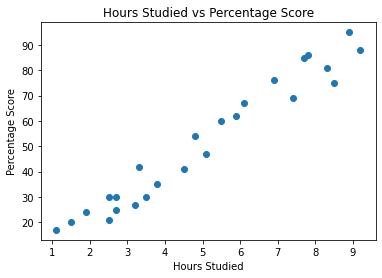

In [54]:
x=df.Hours
y=df.Scores

plt.scatter(x,y)
plt.title("Hours Studied vs Percentage Score")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

From the above graph it is clear that there is a positive linear regression between percentage score and hours studied

## Testing and Training data

In [38]:
#Divide the data into attributes X and label Y
x= df.iloc[:, :-1].values
y= df.iloc[:, 1].values

In [39]:
#Now Divide the data into train test split using sckit-learn built in train_test_split() method
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)

## Training the model

In [40]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train, y_train)
print("Training our algorithm is finished")

Training our algorithm is finished


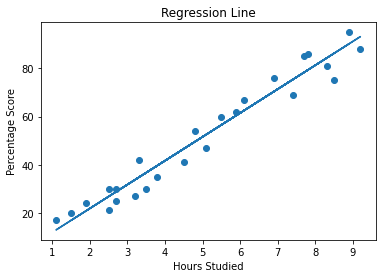

In [55]:
#Plotting the regression line
line = reg.coef_*x+reg.intercept_

#Plotting for test data
plt.scatter(x,y)
plt.plot(x, line);
plt.title("Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

## Prediction

In [42]:
#displaying the test data(in Hours) and making some predictions on the test data
print(x_test)
Prediction= reg.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Text(0, 0.5, 'Percentage Score')

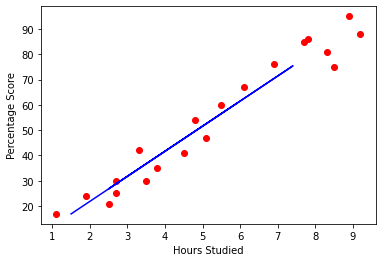

In [57]:
plt.scatter(x_train,y_train, color= "red")
plt.plot(x_test,Prediction, color= "blue")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")

scatter plot of the test values vs predicted values

In [44]:
#Comparing Actual vs Predicted
dt=pd.DataFrame({'Actual': y_test, 'Predicted': Prediction})
dt

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


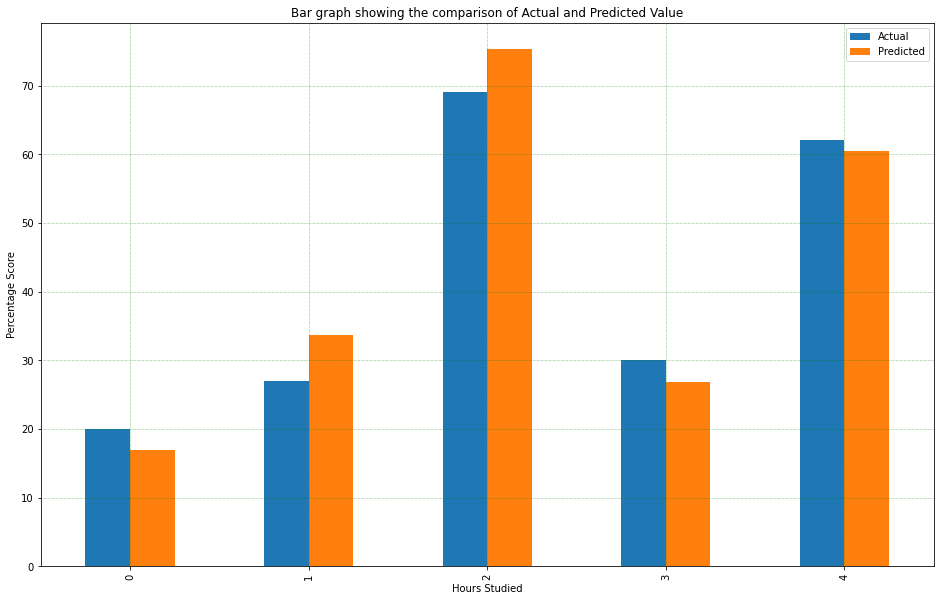

In [60]:
#Comparison of Actual and predicted value in Bar graph representation
dt.plot(kind='bar',figsize=(16,10))
plt.title('Bar graph showing the comparison of Actual and Predicted Value')
plt.grid(which='major',linestyle=':',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

## Predicted score if a student study for 9.25 hrs in a day

In [46]:
Prediction_score=reg.predict([[9.25]])
print("predicted score for student studying 9.25hrs is:", Prediction_score)

predicted score for student studying 9.25hrs is: [93.69173249]


## Evalution of Model

The final step is to evaluate the performance of algorithm. This step helps us to compare how different algorithms perform on a particular dataset

1. Mean Square Error
2. Mean Aboslute Error 
3. R Squared Error
4. Model Score 

In [52]:
from sklearn import metrics
print("Mean Squared Error is : ",mean_squared_error(y_test,Prediction))

print("Mean Absoute Error is : ",mean_absolute_error(y_test,Prediction))

print("R-Squared Error is : ", np.sqrt(metrics.mean_squared_error(y_test, Prediction)))

print("Model Score is : ", reg.score(x,y))

Mean Squared Error is :  21.598769307217456
Mean Absoute Error is :  4.183859899002982
R-Squared Error is :  4.647447612100373
Model Score is :  0.9526947647057273


Model score is 0.9529, which shows that model performance is good.
